## First, load our dependencies.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Load The Airline Data

In [20]:
df=pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Knowing the nature of data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [22]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [23]:
df.shape         # Show structure of the dataframe

(129880, 23)

## Check if there is any nyll value

In [24]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## Arrival Delay in Minutes have 393 Null Values

In [25]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

## Drop column "Arrival Delay in Minutes"

In [26]:
df = df.drop(['Arrival Delay in Minutes'], axis=1)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,1,3,2,3,3,1,2,1,174
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,2,4,4,3,4,2,3,2,155
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,2,3,3,2,3,2,1,2,193


## Exploratory Data Analysis 

In [27]:
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0


## Feature Selection

<AxesSubplot:>

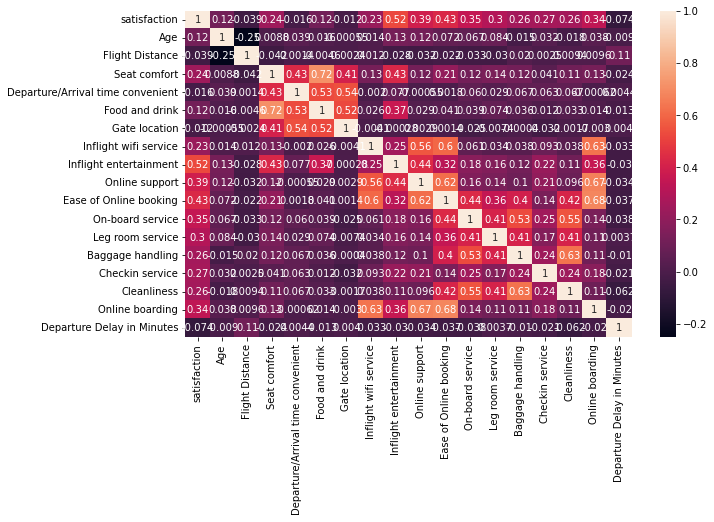

In [28]:
cor = df.corr()
plt.figure(figsize=(10,6))
sn.heatmap(cor,annot=True)

#### As Seen in analysis, "Flight Distance,Departure/Arrival time convenient,Gate location,Departure Delay in Minutes,satisfaction" are the least impactfull deatures. drop them

In [29]:
x=df.drop(['Flight Distance','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','satisfaction'],axis=1)
x.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,Female,Loyal Customer,65,Personal Travel,Eco,0,0,2,4,2,3,3,0,3,5,3,2
1,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,2,2,3,4,4,4,2,3,2
2,Female,Loyal Customer,15,Personal Travel,Eco,0,0,2,0,2,2,3,3,4,4,4,2


In [30]:
y= df["satisfaction"]
y.head(3)

0    1
1    1
2    1
Name: satisfaction, dtype: int64

## OHE on Nominal Data

In [31]:
categorical_columns=['Gender','Customer Type','Type of Travel','Class'] # must be a list
x=pd.get_dummies(x, columns=categorical_columns)
x.head()

,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,...,Online boarding,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,0,0,2,4,2,3,3,0,3,...,2,1,0,1,0,0,1,0,1,0
1,47,0,0,0,2,2,3,4,4,4,...,2,0,1,1,0,0,1,1,0,0
2,15,0,0,2,0,2,2,3,3,4,...,2,1,0,1,0,0,1,0,1,0
3,60,0,0,3,4,3,1,1,0,1,...,3,1,0,1,0,0,1,0,1,0
4,70,0,0,4,3,4,2,2,0,2,...,5,1,0,1,0,0,1,0,1,0


## Data spliting between train and test

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state= 42,stratify=y )

# Model Building using Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logi = LogisticRegression()
logi.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logi.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



c:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Building using Random Forest 

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
rf_model.score(x_train,y_train)

0.9998363874345549

In [35]:
rf_model.score(x_test,y_test)

0.9551124114567293

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


hyp = {'n_estimators': np.arange(10,200,10),
        'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,10),
    'min_samples_split': np.arange(2,20),
    'min_samples_leaf': np.arange(2,10)
}
rscv=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [38]:
model=rscv.best_estimator_

In [39]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=160)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_train_pred = model.predict(x_train)
acc= accuracy_score(y_train,train_pred)
acc

0.9209270095472744

In [43]:
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[10668,  1091],
       [  978, 13239]], dtype=int64)

In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11759
           1       0.92      0.93      0.93     14217

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



# Model Building using Decision Tree

In [47]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

tree.score(x_train,y_train)

0.9998363874345549

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


hyp = {'n_estimators': np.arange(10,200,10),
        'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,10),
    'min_samples_split': np.arange(2,20),
    'min_samples_leaf': np.arange(2,10)
}
rscv=RandomizedSearchCV(rf_model,hyp,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [49]:
model=rscv.best_estimator_
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=11, n_estimators=50)

In [52]:
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[10657,  1102],
       [  968, 13249]], dtype=int64)

In [53]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11759
           1       0.92      0.93      0.93     14217

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



# Model Building using KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
Y_test_pred=knn.predict(x_test)
confusion_test=confusion_matrix(y_test, Y_test_pred)
print(classification_report(y_test, y_test_pred))
confusion_test

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11759
           1       0.92      0.93      0.93     14217

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



array([[10850,   909],
       [ 1642, 12575]], dtype=int64)

## Comparing the model performance using AUC ROC

c:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


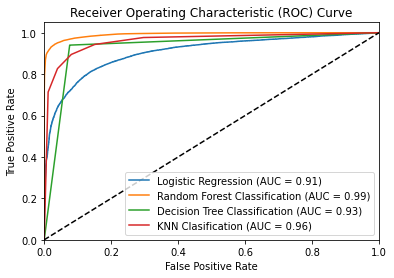

In [60]:
from sklearn.metrics import roc_curve, auc
models = {"Logistic Regression": LogisticRegression(),
          'Random Forest Classification': RandomForestClassifier(),
          'Decision Tree Classification': DecisionTreeClassifier(),
          'KNN Clasification': KNeighborsClassifier()}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### As seen in the figure, Random forest is giving best performance.